# Assignment 2: Exploratory Data Analysis - Solutions

This assignment covers **Chapters 7, 8 and 14.1-14.2 (Up to but not including Chebychev’s Bounds)** from the textbook as well as lecture material from Weeks 3-4. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

Revisions are due by **11:59pm on Friday, September 27**.

In [1]:
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

# This is if you want your plots to have the FiveThirtyEight style
plots.style.use('fivethirtyeight')

### Question 1. Unemployment

The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**a) The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.**

In [2]:
unemployment = Table.read_table("unemployment.csv")

We'll also take a quick look at the table to get a sense for what it looks like.

In [3]:
unemployment.labels
unemployment.show(5)

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832


**b) It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.) Call the array `pter`.**

> Note that `unemployment.column()` returns an array. This means that we can extract out the columns as arrays, then use array subtraction to get the PTER array. 

In [4]:
pter = unemployment.column("NEI-PTER")-unemployment.column("NEI")

**c) Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call this new table `by_pter`.**

> Below, we've done this in one step, using `with_column()` to add the PTER column, then using `sort()` to sort by that column. You can also do it in multiple steps. 

In [5]:
by_pter=unemployment.with_column("PTER",pter).sort("PTER", descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


**d) We want to create a line plot of the PTER over time. To do this, we first add a `year` array and the `pter` array to the `unemployment` table labeled `Year` and `PTER`, respectively. Use the code below to create `pter_over_time`.**

In [6]:
# Make sure your previous sections have created by_pter and pter properly for this to work!
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns('Year', year,'PTER',pter)

Create a line plot using `pter_over_time`.

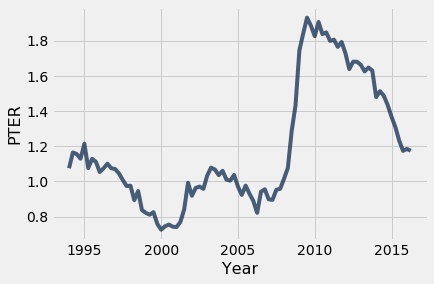

In [7]:
data_line=pter_over_time.select('Year','PTER')
data_line.plot('Year')

**e) Were PTER rates high during or directly after the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)?**

The visualization shows PTER around 0.8 to 1.2 for most of the yers preceeding 2008. Around 2008, it then shoots up to around 1.8, before falling back down below 1.8 around 2011. It does seem to be the case that PTER rates were particularly high during or directly after the Great Recession.

### Question 2. Causes of Death by Year

This exercise is designed to give you practice using the Table method `pivot`. [Here](http://data8.org/sp19/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

We'll be looking at a [dataset](http://www.healthdata.gov/dataset/leading-causes-death-zip-code-1999-2013) from the California Department of Public Health that records the cause of death, as recorded on a death certificate, for everyone who died in California from 1999 to 2013.  The data is in the file `causes_of_death.csv`. Each row records the number of deaths by a specific cause in one year in one ZIP code.

In [8]:
causes = Table.read_table('causes_of_death.csv')
causes

Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"
1999,90009,OTH,1,"(33.9452, -118.3832)"
1999,90010,STK,1,"(34.060633, -118.302664)"
1999,90010,CLD,1,"(34.060633, -118.302664)"
1999,90010,DIA,1,"(34.060633, -118.302664)"


The causes of death in the data are abbreviated.  We've provided a table called `abbreviations.csv` to translate the abbreviations.

In [9]:
abbr = Table.read_table('abbreviations.csv')

The dataset is missing data on certain causes of death, such as homicide and hypertensive renal disease, for certain years.  It looks like those causes of death are relatively rare, so for some purposes it makes sense to drop them from consideration.  Of course, we'll have to keep in mind that we're no longer looking at a comprehensive report on all deaths in California.

**a)Let's clean up our data. First, filter out the HOM, HYP, and NEP rows from the table for the reasons described above. Next, join together the abbreviations table and our causes of death table so that we have a more detailed discription of each disease in each row (for help on how to do this, see Chapter 8.4). Lastly, drop the column which contains the acronym of the disease, and rename the column with the full description 'Cause of Death'. Assign the variable `cleaned_causes` to the resulting table.**

*Hint:* You should expect this to take more than one line. Use many lines and many intermediate tables to complete this question.

> We'll use temporary Tables in between our final table and our initial table so that we don't risk messing anything up.

In [10]:
causes.show(5)

Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90005,HOM,1,"(34.058508, -118.301197)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"


In [11]:
# First remove rows with 'HOM'
temp = causes.where('Cause of Death',are.not_equal_to('HOM'))
temp.show(5) # check to make sure this is doing what we want it to do.

Year,ZIP Code,Cause of Death,Count,Location
1999,90002,SUI,1,"(33.94969, -118.246213)"
1999,90006,ALZ,1,"(34.049323, -118.291687)"
1999,90007,ALZ,1,"(34.029442, -118.287095)"
1999,90009,DIA,1,"(33.9452, -118.3832)"
1999,90009,LIV,1,"(33.9452, -118.3832)"


In [12]:
# remove rows with HYP and NEP at the same time
temp2 = temp.where('Cause of Death', are.not_equal_to('HYP')).where('Cause of Death', are.not_equal_to('NEP'))

In [13]:
# Join the abbreviations table and the cause of death table to include full description
# Note that you need to join on the Cause of Death column from both tables because that is the column
# with the same information in both tables.
temp3 = temp2.join('Cause of Death', abbr, 'Cause of Death')
temp3.show(5)

Cause of Death,Year,ZIP Code,Count,Location,Cause of Death (Full Description)
ALZ,1999,90006,1,"(34.049323, -118.291687)",Alzheimer's Disease
ALZ,1999,90007,1,"(34.029442, -118.287095)",Alzheimer's Disease
ALZ,1999,90012,1,"(34.061396, -118.238479)",Alzheimer's Disease
ALZ,1999,90015,1,"(34.043439, -118.271613)",Alzheimer's Disease
ALZ,1999,90017,1,"(34.055864, -118.266582)",Alzheimer's Disease


In [14]:
# Drop Cause of Death and relabel the long name
cleaned_causes = temp3.drop('Cause of Death').relabeled('Cause of Death (Full Description)','Cause of Death')

# Check if it's ok
cleaned_causes.show(5)

Year,ZIP Code,Count,Location,Cause of Death
1999,90006,1,"(34.049323, -118.291687)",Alzheimer's Disease
1999,90007,1,"(34.029442, -118.287095)",Alzheimer's Disease
1999,90012,1,"(34.061396, -118.238479)",Alzheimer's Disease
1999,90015,1,"(34.043439, -118.271613)",Alzheimer's Disease
1999,90017,1,"(34.055864, -118.266582)",Alzheimer's Disease


**b) We're going to examine the changes in causes of death over time.  To make a plot of those numbers, we need to have a table with one row for each year and a column for each kind of death, where each cell contains the number of deaths by that cause in that year. Create this table and call it `cleaned_causes_by_year` (for help on how to do this, see Chapter 8.3).**

> We use pivot for this. Since we want to add up the count of each cause of death, we use values = 'Count' and collect = sum

In [15]:
cleaned_causes_by_year = cleaned_causes.pivot('Cause of Death','Year',values='Count', collect=sum)
cleaned_causes_by_year

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,38392,3934,18079,3546,13187,6004,69900,3047,52880,8014,8940
2000,39259,4398,18090,3673,12754,6203,68533,3113,53005,8355,8814
2001,38383,4897,18078,3759,13056,6457,69004,3256,53810,8167,9274
2002,41177,5405,17551,3725,12643,6783,68387,3210,53926,8098,9882
2003,40325,6585,17686,3832,13380,7088,69013,3396,54307,8184,10470
2004,39926,6962,16884,3686,12519,7119,65002,3364,53708,7331,10614
2005,41791,7694,15550,3819,13166,7679,64684,3188,54606,7537,10924
2006,42965,8141,15011,3826,12807,7367,64648,3296,54043,7329,11236
2007,43130,8495,13724,4052,12497,7395,62220,3543,54918,6522,11426
2008,42800,10095,13792,4142,13346,7349,60739,3729,54579,6576,10667


**c) Make a plot of all the causes of death by year, using your cleaned-up version of the dataset.  There should be a single plot with one line per cause of death.**

*Hint:* Use the Table method `plot`.  If you pass only a single argument, a line will be made for each of the other columns.

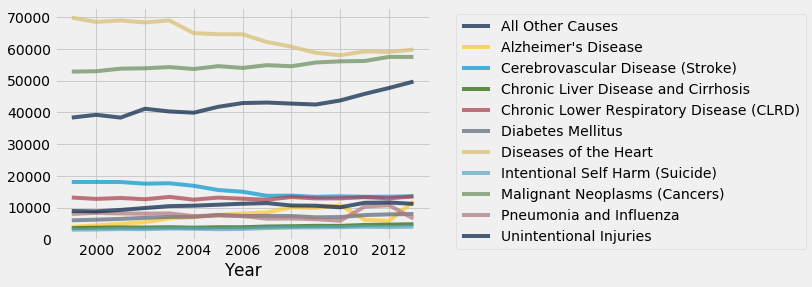

In [16]:
cleaned_causes_by_year.plot('Year')

**d) After seeing the plot above, we would now like to examine the distributions of diseases over the years using percentages. Below, we have assigned `distributions` to a table with all of the same columns, but the raw counts in the cells are replaced by the percentage of the the total number of deaths by a particular disease that happened in that specific year.** 

**Try to understand the code below and explain, in words, what it does.**

In [17]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

labels = cleaned_causes_by_year.labels
labels
distributions = Table().with_columns(labels[0], cleaned_causes_by_year.column(0),
                                     labels[1], percents(cleaned_causes_by_year.column(1)),
                                     labels[2], percents(cleaned_causes_by_year.column(2)),
                                     labels[3], percents(cleaned_causes_by_year.column(3)),
                                     labels[4], percents(cleaned_causes_by_year.column(4)),
                                     labels[5], percents(cleaned_causes_by_year.column(5)),
                                     labels[6], percents(cleaned_causes_by_year.column(6)),
                                     labels[7], percents(cleaned_causes_by_year.column(7)),
                                     labels[8], percents(cleaned_causes_by_year.column(8)),
                                     labels[9], percents(cleaned_causes_by_year.column(9)),
                                     labels[10], percents(cleaned_causes_by_year.column(10)),
                                     labels[11], percents(cleaned_causes_by_year.column(11)))
distributions.show()

Year,All Other Causes,Alzheimer's Disease,Cerebrovascular Disease (Stroke),Chronic Liver Disease and Cirrhosis,Chronic Lower Respiratory Disease (CLRD),Diabetes Mellitus,Diseases of the Heart,Intentional Self Harm (Suicide),Malignant Neoplasms (Cancers),Pneumonia and Influenza,Unintentional Injuries
1999,6.02,3.54,7.8,5.86,6.76,5.61,7.3,5.8,6.43,6.91,5.68
2000,6.16,3.96,7.8,6.07,6.54,5.8,7.16,5.92,6.44,7.21,5.6
2001,6.02,4.4,7.8,6.21,6.7,6.04,7.21,6.19,6.54,7.05,5.9
2002,6.46,4.86,7.57,6.15,6.48,6.34,7.15,6.11,6.55,6.99,6.28
2003,6.32,5.92,7.63,6.33,6.86,6.63,7.21,6.46,6.6,7.06,6.66
2004,6.26,6.26,7.28,6.09,6.42,6.66,6.79,6.4,6.53,6.32,6.75
2005,6.55,6.92,6.71,6.31,6.75,7.18,6.76,6.06,6.64,6.5,6.94
2006,6.74,7.32,6.47,6.32,6.57,6.89,6.75,6.27,6.57,6.32,7.14
2007,6.76,7.64,5.92,6.69,6.41,6.91,6.5,6.74,6.67,5.63,7.26
2008,6.71,9.08,5.95,6.84,6.85,6.87,6.35,7.09,6.63,5.67,6.78


> This code is first creating a function called `percents()` that takes an array and returns an array of the same length with the percentage of the whole array that each element represents. Then, the column names are stored inside `labels`, and the `percents` function is applied to each column, creating a new Table called `distributions`, with column names equal to the column names in `cleaned_causes_by_year` except with column proportions instead of raw values.

**e) We suspect that the larger percentage of stroke-related deaths over the years 1999-2013 happened in the earlier years, while the larger percentage of deaths related to Chronic Liver Disease over this time period occured in the most recent years. Draw a bar chart to display both of the distributions of these diseases over the time period. What is your conclusion based on the bar chart?**

*Hint:* The relevant column labels are "Cerebrovascular Disease (Stroke)" and "Chronic Liver Disease and Cirrhosis"

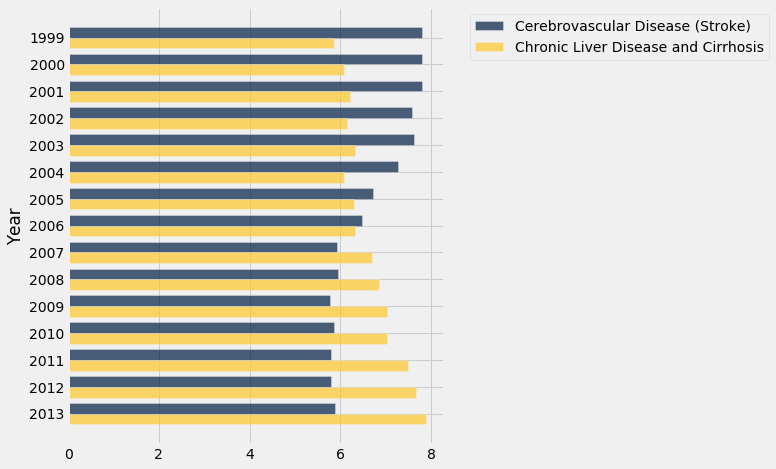

In [18]:
# Create a bar chart by subsetting data to just the columns we want, then using .barh
distributions.select('Year','Cerebrovascular Disease (Stroke)', 'Chronic Liver Disease and Cirrhosis').barh('Year')

The graph seems to support the hypothesis. Stroke-related deaths seem to have a larger proportion in earlier years (remember, this is column proportion, so it's the proportion of all stroke-related deaths that happened in that year), while the opposite is true for Chronic Liver Disease.

### Question 3. Cards Against Humanity - Pulse of the Nation Public Opinion Poll

In this question, we'll explore the Cards Against Humanity poll dataset further using the tools we've learned. For your convenience, we have made a subset of the data available to you in a CSV file called `201709-CAH_PulseOfTheNation.csv`.

In [19]:
cah = Table.read_table('201709-CAH_PulseOfTheNation.csv')

**a) Write a function called `is_not_zero` which takes a numerical input and returns `True` if the value isn't 0 and `False` if the value is 0.**

> Here, consider three different ways of writing this function

In [20]:
def is_not_zero(x):
    return x != 0

In [21]:
def is_not_zero(x):
    if x == 0:
        return False
    else:
        return True

In [22]:
def is_not_zero(x):
    if x == 0:
        return False
    if x != 0:
        return True

**b) Add a new column to `cah` called "Has watched any Transformers movies" which is `True` if the person has watched any Transformers movies and `False` if they haven't.**

*Hint:* Use the `apply` method. See **Chapter 8.1** for details.

In [23]:
# Identify the correct label to use.
cah.labels

('Income',
 'Gender',
 'Age',
 'Age Range',
 'Political Affiliation',
 'Do you approve or disapprove of how Donald Trump is handling his job as president?',
 'What is your highest level of education? ',
 'What is your race?',
 'What is your marital status?',
 'What would you say is the likelihood that your current job will be entirely performed by robots or computers within the next decade?',
 'Do you believe that climate change is real and caused by people, real but not caused by people, or not real at all?',
 'How many Transformers movies have you seen? ',
 'Do you agree or disagree with the following statement: scientists are generally honest and are serving the public good. ',
 'Do you agree or disagree with the following statement: vaccines are safe and protect children from disease.',
 'How many books, if any, have you read in the past year?',
 'Do you believe in ghosts?',
 'What percentage of the federal budget would you estimate is spent on scientific research?',
 'Is federal f

In [24]:
# We add a new column using the output of the apply function
trans_vals = cah.apply(is_not_zero, 'How many Transformers movies have you seen? ')
cah_new = cah.with_column("Has watched any Transformers movies", trans_vals)
cah_new.show(5)
cah = cah_new # we created a new Table temporarily so that we don't overwrite the original if it isn't right.

Income,Gender,Age,Age Range,Political Affiliation,Do you approve or disapprove of how Donald Trump is handling his job as president?,What is your highest level of education?,What is your race?,What is your marital status?,What would you say is the likelihood that your current job will be entirely performed by robots or computers within the next decade?,"Do you believe that climate change is real and caused by people, real but not caused by people, or not real at all?",How many Transformers movies have you seen?,Do you agree or disagree with the following statement: scientists are generally honest and are serving the public good.,Do you agree or disagree with the following statement: vaccines are safe and protect children from disease.,"How many books, if any, have you read in the past year?",Do you believe in ghosts?,What percentage of the federal budget would you estimate is spent on scientific research?,"Is federal funding of scientific research too high, too low, or about right?",True or false: the earth is always farther away from the sun in the winter than in the summer.,"If you had to choose: would you rather be smart and sad, or dumb and happy?",Do you think it is acceptable or unacceptable to urinate in the shower?,Has watched any Transformers movies
68000,Female,56,55-64,Democrat,Strongly disapprove,High school,Black,Single,Unlikely,DK/REF,0,Somewhat Agree,Somewhat Disagree,6,No,90,Too High,FALSE,Smart and Sad,Unacceptable,False
46000,Male,63,55-64,Independent,Somewhat Approve,Some college,White,Married,Unlikely,Real but not Caused by People,0,Somewhat Agree,Strongly Agree,0,No,20,About Right,TRUE,Dumb and happy,Acceptable,False
51000,Male,48,45-54,Republican,Strongly Approve,High school,White,Divorced,Unlikely,Not Real At All,0,Somewhat Disagree,Somewhat Disagree,1,No,10,About Right,FALSE,Dumb and happy,Unacceptable,False
54000,Female,64,55-64,Democrat,Strongly disapprove,Some college,White,Married,DK/REF,Real and Caused by People,0,Strongly Agree,Strongly Agree,15,No,1,Too Low,TRUE,Smart and Sad,Unacceptable,False
83000,Male,61,55-64,Independent,Somewhat Approve,College degree,White,Divorced,Unlikely,Real but not Caused by People,0,Strongly Agree,Strongly Agree,0,Yes,10,About Right,TRUE,Dumb and happy,Unacceptable,False


**c) How many people have watched any Transformers movies? How many have not? Use the `group` method to find the answer.**

In [25]:
cah.group("Has watched any Transformers movies")

Has watched any Transformers movies,count
False,154
True,156


> 156 people have watched at least one Transformers movie, while 154 have not.

**d) Do people who are less educated tended to believe in ghosts more? Use summaries and at least one visualization to support your answer.**

*Hint:* Find a summary using the `pivot` method and use the `barh` method to get a barchart.

In [26]:
# Let's subset so we only have the data we need for this.
# We'll also rename to make our lives easier
ghosts = cah.select('What is your highest level of education? ', 'Do you believe in ghosts?')
ghosts = ghosts.relabeled('What is your highest level of education? ', 'education').relabeled('Do you believe in ghosts?', 'believe_ghosts')
ghosts.show(5)

education,believe_ghosts
High school,No
Some college,No
High school,No
Some college,No
College degree,Yes


In [27]:
ghosts_tab = ghosts.pivot('education','believe_ghosts')
ghosts_tab

believe_ghosts,College degree,Graduate degree,High school,Other,Some college
DK/REF,1,5,0,0,2
No,68,49,33,1,36
Yes,37,26,21,4,27


> This can be hard to read. Let's find column proportions.

In [28]:
# This is already defined from above, but rewriting it here for reference.
def percents(array_x):
    return np.round((array_x/sum(array_x))*100, 2)

# We also do some rearranging to put it in an intuitive order (education level is ordinal!)
ghost_distribution = Table().with_columns('BelieveGhosts',ghosts_tab.column(0),
                                          'HighSchool Percent', percents(ghosts_tab.column(3)),
                                          'SomeCollege Percent', percents(ghosts_tab.column(5)),
                                          'College Percent', percents(ghosts_tab.column(1)),
                                          'Graduate Percent', percents(ghosts_tab.column(2)),
                                          'Other Percent', percents(ghosts_tab.column(4))
                                         )
ghost_distribution

BelieveGhosts,HighSchool Percent,SomeCollege Percent,College Percent,Graduate Percent,Other Percent
DK/REF,0,3.08,0.94,6.25,0
No,61.11,55.38,64.15,61.25,20
Yes,38.89,41.54,34.91,32.5,80


> There doesn't actually seem to be a huge change by education level. Ignoring the "Other" category, it's generally around 60% "No" and 35-40% "Yes". Let's look at a bar graph to see if we can see any differences on it.

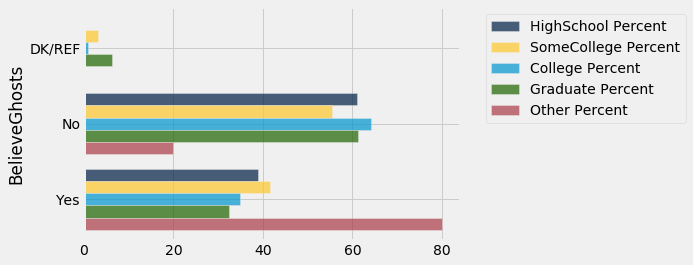

In [29]:
ghost_distribution.barh('BelieveGhosts')

> Again, besides the "Other" group, the bar lengths aren't too different.